In [1]:
# Import Python libraries for visualisation and data analysis
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy.stats as stats
import seaborn as sns
# 設定 seaborn 主題，這會影響圖表的風格和顏色
sns.set_theme()  # Apply the default Seaborn theme
%matplotlib inline
# Libraries for statistical and scientific computing
import statsmodels.api as sm
from scipy import stats

In [2]:
## Load packages
import tensorflow as tf
from tensorflow import keras
import tensorflow.python.keras.backend as K
from tensorflow.keras import backend
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, LSTM

from keras import backend
import numpy as np
import matplotlib.pyplot as plt

from pandas import read_csv
import math
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

import pandas as pd

In [3]:
!python3 --version
!pip3 install matplotlib
!pip3 install pandas
!pip3 install scipy
!pip3 install seaborn
!pip3 install statsmodels
!pip3 install plotly.express
!pip3 install scalecast --upgrade
!pip3 install --upgrade pip
!pip3 install \
   --no-binary lightgbm \
   --config-settings=cmake.define.USE_OPENMP=OFF \
   'lightgbm>=4.2.0'


Python 3.9.6
Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable


In [4]:
# 使用pandas讀取CSV文件
df = pd.read_csv('https://raw.githubusercontent.com/xc90529/noninvasiv_visualization/main/DATA%20SET/noninvasive_data.csv')

# To display the top 5 rows
df.head(5)
#CO-心輸出量
#CI - 心輸出指數
#SV - 舒張容積
#SVI - 舒張容積指數
#SVV - 舒張容積變異度
#SVR - 舒張容積阻力
#SVRI - 舒張容積指數阻力
#PR - 脈搏率
#SYS - 收縮壓
#DIA - 舒張壓
#MAP - 平均動脈壓

,si1m,CO,CI,SV,SVI,SVV,SVR,SVRI,PR,SYS,DIA,MAP,ID,time
0,N,4.0,2.4,43,26.0,10,1673.0,2745.0,93,116,74,91,#_1,120.000000
1,N,4.0,2.4,43,26.0,10,1683.0,2760.0,92,118,74,91,#_1,120.333333
2,N,3.6,2.2,39,24.0,17,1978.0,3245.0,92,121,80,97,#_1,120.666667
3,N,3.6,2.2,41,25.0,17,1868.0,3065.0,88,118,76,93,#_1,121.000000
4,N,4.2,2.6,42,26.0,10,1335.0,2190.0,100,100,66,78,#_1,121.333333


In [5]:
# Calculating the Shock Index as PR / SYS
df['PR/SYS'] = df['PR'] / df['SYS']

# Displaying the first few rows of the dataframe to confirm the new variable
df.head()

,si1m,CO,CI,SV,SVI,SVV,SVR,SVRI,PR,SYS,DIA,MAP,ID,time,PR/SYS
0,N,4.0,2.4,43,26.0,10,1673.0,2745.0,93,116,74,91,#_1,120.000000,0.801724
1,N,4.0,2.4,43,26.0,10,1683.0,2760.0,92,118,74,91,#_1,120.333333,0.779661
2,N,3.6,2.2,39,24.0,17,1978.0,3245.0,92,121,80,97,#_1,120.666667,0.760331
3,N,3.6,2.2,41,25.0,17,1868.0,3065.0,88,118,76,93,#_1,121.000000,0.745763
4,N,4.2,2.6,42,26.0,10,1335.0,2190.0,100,100,66,78,#_1,121.333333,1.000000


In [6]:
# Remove the 'ID' column and the 'si1m' column from your DataFrame
columns_to_check = df.drop(columns=['ID', 'si1m', ])

# Use the duplicated method to find duplicate rows
duplicate_rows = df[df.duplicated(subset=columns_to_check, keep=False)]

# Print the content of duplicate rows
print("Duplicate rows:")
print(duplicate_rows)
# 要排除的列名
columns_to_exclude = ['ID', 'si1m']

# 选择除了要排除的列以外的其他列
columns_to_check = df.columns[~df.columns.isin(columns_to_exclude)]

# 使用 selected_columns 作为子集来检查重复行，保留第一个重复行
duplicate_rows_df = df[df.duplicated(subset=columns_to_check, keep='first')]

# 打印重复行的数量
print("重复行的数量：", duplicate_rows_df.shape[0])

# 打印重复行的内容
print("重复行：")
print(duplicate_rows_df)
# 重置索引
df.reset_index(drop=True, inplace=True)

# 在原始数据框 df 中删除重复行
df = df.drop(duplicate_rows_df.index)

# 现在 df 中已经不包含重复行
print(df)

Duplicate rows:
      si1m   CO        CI  SV        SVI  SVV     SVR         SVRI   PR  SYS  \
17619    N  3.1  1.962025  49  31.012658   18  1558.0   986.075949   64   97   
17620    N  3.1  1.962025  49  31.012658   18  1558.0   986.075949   64   97   
17621    Y  2.9  1.835443  46  29.113924   17  1643.0  1039.873418   63   94   
17622    N  2.9  1.835443  46  29.113924   17  1643.0  1039.873418   63   94   
17623    Y  2.8  1.772152  45  28.481013   18  1878.0  1188.607595   62  101   
...    ...  ...       ...  ..        ...  ...     ...          ...  ...  ...   
35911    N  3.1  2.300000  27  20.000000   16  2038.0  2790.000000  116  101   
35912    Y  3.1  2.200000  27  20.000000   16  2045.0  2800.000000  112  101   
35913    N  3.1  2.200000  27  20.000000   16  2045.0  2800.000000  112  101   
35914    Y  2.9  2.100000  29  21.000000   13  2150.0  2945.000000  102  101   
35915    N  2.9  2.100000  29  21.000000   13  2150.0  2945.000000  102  101   

       DIA  MAP    ID  

In [7]:
# 四舍五入 df 中的所有数值列到小数点后第五位
rounded_df = df.round(5)

rounded_df.head()

,si1m,CO,CI,SV,SVI,SVV,SVR,SVRI,PR,SYS,DIA,MAP,ID,time,PR/SYS
0,N,4.0,2.4,43,26.0,10,1673.0,2745.0,93,116,74,91,#_1,120.00000,0.80172
1,N,4.0,2.4,43,26.0,10,1683.0,2760.0,92,118,74,91,#_1,120.33333,0.77966
2,N,3.6,2.2,39,24.0,17,1978.0,3245.0,92,121,80,97,#_1,120.66667,0.76033
3,N,3.6,2.2,41,25.0,17,1868.0,3065.0,88,118,76,93,#_1,121.00000,0.74576
4,N,4.2,2.6,42,26.0,10,1335.0,2190.0,100,100,66,78,#_1,121.33333,1.00000


相關性分析

In [8]:
# Repeating the process due to an internal exception encountered previously
# Convert 'si1m' to a binary variable directly for correlation analysis
rounded_df['si1m'] = rounded_df['si1m'].apply(lambda x: 1 if x == 'Y' else 0)
rounded_df_scaled = rounded_df.copy()

# Drop the 'ID' column since it's not relevant for correlation analysis
rounded_df_scaled.drop(['ID'], axis=1, inplace=True)

# Calculate the Pearson correlation coefficient between 'si1m' and other variables
correlation_matrix = rounded_df_scaled.corr()

# Display the correlation of 'si1m' with other variables
correlation_matrix['si1m']
##選擇PR/SYS,PR,SYS,SVI,MAP,si1m來預測PR/SYS

si1m      1.000000
CO        0.033251
CI        0.034217
SV       -0.297894
SVI      -0.336060
SVV       0.090539
SVR      -0.122073
SVRI     -0.053453
PR        0.551291
SYS      -0.400070
DIA      -0.045034
MAP      -0.254025
time     -0.052093
PR/SYS    0.648060
Name: si1m, dtype: float64

In [9]:
# 選擇病人 #_9 的數據
id9 = rounded_df[rounded_df['ID'] == '#_9']
id9

,si1m,CO,CI,SV,SVI,SVV,SVR,SVRI,PR,SYS,DIA,MAP,ID,time,PR/SYS
6590,0,3.6,2.3,46,29.0,19,1444.44444,2260.86957,78,91,57,69,#_9,120.00000,0.85714
6591,0,3.8,2.4,42,27.0,35,1452.63158,2300.00000,90,94,60,73,#_9,120.33333,0.95745
6592,0,4.3,2.8,48,31.0,22,1227.90698,1885.71429,89,88,59,70,#_9,120.66667,1.01136
6593,0,4.4,2.9,47,30.0,20,1236.36364,1875.86207,95,92,59,72,#_9,121.00000,1.03261
6594,0,4.2,2.7,44,28.0,22,1238.09524,1925.92593,96,89,56,69,#_9,121.33333,1.07865
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8796,0,3.0,2.0,42,27.0,21,1840.00000,2760.00000,73,90,61,73,#_9,1393.00000,0.81111
8797,0,2.5,1.6,35,22.0,21,2016.00000,3150.00000,73,81,56,67,#_9,1393.33333,0.90123
8798,0,3.4,2.2,46,30.0,34,1694.11765,2618.18182,74,89,63,76,#_9,1394.66667,0.83146
8799,0,2.4,1.5,35,22.0,34,1766.66667,2826.66667,68,70,44,57,#_9,1395.00000,0.97143


使用Z-score移除異常值

In [10]:
# 参数化验证集和测试集占总数据的比例
val_ratio = 0.2
test_ratio = 0.2

# 计算各数据集的大小
total_size = len(id9)
test_size = int(total_size * test_ratio)  # 计算测试集大小
val_size = int(total_size * val_ratio)    # 计算验证集大小

# 剩余的为训练集大小
train_size = total_size - test_size - val_size

# 定义分割索引
val_start = total_size - test_size - val_size
test_start = total_size - test_size

# 分割DataFrame
train_df = id9.iloc[:val_start]
val_df = id9.iloc[val_start:test_start]
test_df = id9.iloc[test_start:]

# 检查分割结果
print(f"训练集大小：{len(train_df)}")
print(f"验证集大小：{len(val_df)}")
print(f"测试集大小：{len(test_df)}")


训练集大小：1327
验证集大小：442
测试集大小：442


In [11]:
from scipy.stats import zscore

# 定义异常值检测和移除函数，只处理指定列
def remove_outliers_zscore_single_variable(df, columns=('PR/SYS', 'PR', 'SYS', 'SVI', 'MAP'), threshold=3):
    # 计算指定列的z分数
    z_scores = df[columns].apply(zscore)
    # 生成布尔遮罩，仅保留所有指定列z分数绝对值小于阈值的行
    mask = (z_scores.abs() < threshold).all(axis=1)
    return df[mask]

# 分别处理训练集、验证集和测试集的指定列的异常值
train_df_cleaned = remove_outliers_zscore_single_variable(train_df, columns=['PR/SYS', 'PR', 'SYS', 'SVI', 'MAP'])
val_df_cleaned = remove_outliers_zscore_single_variable(val_df, columns=['PR/SYS', 'PR', 'SYS', 'SVI', 'MAP'])
test_df_cleaned = remove_outliers_zscore_single_variable(test_df, columns=['PR/SYS', 'PR', 'SYS', 'SVI', 'MAP'])

# 检查分割结果
print(f"训练集大小：{len(train_df_cleaned)}")
print(f"验证集大小：{len(val_df_cleaned)}")
print(f"测试集大小：{len(test_df_cleaned)}")


训练集大小：1291
验证集大小：435
测试集大小：430


In [12]:
# 查找 'PR/SYS' 列的最大值
pr_sys_max = train_df_cleaned['PR/SYS'].max()

# 查找 'PR/SYS' 列的最小值
pr_sys_min = train_df_cleaned['PR/SYS'].min()

print(f"'PR/SYS' 最大值: {pr_sys_max}")
print(f"'PR/SYS' 最小值: {pr_sys_min}")


'PR/SYS' 最大值: 1.07865
'PR/SYS' 最小值: 0.50735


In [13]:
# 查找 'PR/SYS' 列的最大值
pr_sys_max = val_df_cleaned['PR/SYS'].max()

# 查找 'PR/SYS' 列的最小值
pr_sys_min = val_df_cleaned['PR/SYS'].min()

print(f"'PR/SYS' 最大值: {pr_sys_max}")
print(f"'PR/SYS' 最小值: {pr_sys_min}")


'PR/SYS' 最大值: 1.09167
'PR/SYS' 最小值: 0.47945


In [14]:
 # 查找 'PR/SYS' 列的最大值
pr_sys_max = test_df_cleaned['PR/SYS'].max()

# 查找 'PR/SYS' 列的最小值
pr_sys_min = test_df_cleaned['PR/SYS'].min()

print(f"'PR/SYS' 最大值: {pr_sys_max}")
print(f"'PR/SYS' 最小值: {pr_sys_min}")


'PR/SYS' 最大值: 1.11429
'PR/SYS' 最小值: 0.57143


In [15]:
# 假设 train_df_cleaned, val_df_cleaned, test_df_cleaned 分别是已经处理异常值的训练集、验证集和测试集

# 合并训练集、验证集和测试集
combined_df = pd.concat([train_df_cleaned, val_df_cleaned, test_df_cleaned], axis=0)

# 按照时间排序
combined_df = combined_df.sort_values(by='time')

# 检查合并后的数据集大小
print(f"合并后的数据集大小: {combined_df.shape}")

# 现在 combined_df 包含了整个数据集，并按时间排序


合并后的数据集大小: (2156, 15)


In [16]:
combined_df

,si1m,CO,CI,SV,SVI,SVV,SVR,SVRI,PR,SYS,DIA,MAP,ID,time,PR/SYS
6590,0,3.6,2.3,46,29.0,19,1444.44444,2260.86957,78,91,57,69,#_9,120.00000,0.85714
6591,0,3.8,2.4,42,27.0,35,1452.63158,2300.00000,90,94,60,73,#_9,120.33333,0.95745
6592,0,4.3,2.8,48,31.0,22,1227.90698,1885.71429,89,88,59,70,#_9,120.66667,1.01136
6593,0,4.4,2.9,47,30.0,20,1236.36364,1875.86207,95,92,59,72,#_9,121.00000,1.03261
6594,0,4.2,2.7,44,28.0,22,1238.09524,1925.92593,96,89,56,69,#_9,121.33333,1.07865
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8796,0,3.0,2.0,42,27.0,21,1840.00000,2760.00000,73,90,61,73,#_9,1393.00000,0.81111
8797,0,2.5,1.6,35,22.0,21,2016.00000,3150.00000,73,81,56,67,#_9,1393.33333,0.90123
8798,0,3.4,2.2,46,30.0,34,1694.11765,2618.18182,74,89,63,76,#_9,1394.66667,0.83146
8799,0,2.4,1.5,35,22.0,34,1766.66667,2826.66667,68,70,44,57,#_9,1395.00000,0.97143


缺失值填充(單一患者id9)

In [17]:
import pandas as pd
import numpy as np

# Removing ID prefix and converting to integers for correct sorting
patient_time_ranges = combined_df.groupby('ID')['time'].agg(['min', 'max'])
patient_time_ranges['ID_numeric'] = patient_time_ranges.index.str.replace('#_', '').astype(int)
patient_time_ranges_sorted = patient_time_ranges.sort_values('ID_numeric')

# Create a mapping from ID to their min and max times
time_ranges = patient_time_ranges_sorted.to_dict('index')

# Function to create and fill the time range based on min and max times for a specific patient
def fill_time_for_id(group, id):
    if group['ID'].iloc[0] == id:
        min_time, max_time = time_ranges[id]['min'], time_ranges[id]['max']
        
        # Generate the full range of desired time values including fractional times
        full_time_range = np.arange(min_time, max_time + 0.00001, 1/3)
        full_time_range = np.round(full_time_range, 5)  # round to 5 decimal places

        # Creating a DataFrame for the complete time range
        full_df = pd.DataFrame(full_time_range, columns=['time'])

        # Merging this with the existing group data
        merged_group = pd.merge(full_df, group, on='time', how='left')

        # Forward fill to handle the missing data
        merged_group.ffill(inplace=True)
        
        # For any remaining missing values (if any)
        merged_group.bfill(inplace=True)
        
        return merged_group
    else:
        return group

# Applying the filling function only to the group for ID #_9
filled_data = pd.concat([fill_time_for_id(group, '#_9') for _, group in combined_df.groupby('ID')])
filled_data_id_9 = filled_data[filled_data['ID'] == '#_9']

# Display a sample of the filled data for ID #_9
filled_data_id_9.head()


,time,si1m,CO,CI,SV,SVI,SVV,SVR,SVRI,PR,SYS,DIA,MAP,ID,PR/SYS
0,120.00000,0.0,3.6,2.3,46.0,29.0,19.0,1444.44444,2260.86957,78.0,91.0,57.0,69.0,#_9,0.85714
1,120.33333,0.0,3.8,2.4,42.0,27.0,35.0,1452.63158,2300.00000,90.0,94.0,60.0,73.0,#_9,0.95745
2,120.66667,0.0,4.3,2.8,48.0,31.0,22.0,1227.90698,1885.71429,89.0,88.0,59.0,70.0,#_9,1.01136
3,121.00000,0.0,4.4,2.9,47.0,30.0,20.0,1236.36364,1875.86207,95.0,92.0,59.0,72.0,#_9,1.03261
4,121.33333,0.0,4.2,2.7,44.0,28.0,22.0,1238.09524,1925.92593,96.0,89.0,56.0,69.0,#_9,1.07865


In [18]:
filled_data_id_9

,time,si1m,CO,CI,SV,SVI,SVV,SVR,SVRI,PR,SYS,DIA,MAP,ID,PR/SYS
0,120.00000,0.0,3.6,2.3,46.0,29.0,19.0,1444.44444,2260.86957,78.0,91.0,57.0,69.0,#_9,0.85714
1,120.33333,0.0,3.8,2.4,42.0,27.0,35.0,1452.63158,2300.00000,90.0,94.0,60.0,73.0,#_9,0.95745
2,120.66667,0.0,4.3,2.8,48.0,31.0,22.0,1227.90698,1885.71429,89.0,88.0,59.0,70.0,#_9,1.01136
3,121.00000,0.0,4.4,2.9,47.0,30.0,20.0,1236.36364,1875.86207,95.0,92.0,59.0,72.0,#_9,1.03261
4,121.33333,0.0,4.2,2.7,44.0,28.0,22.0,1238.09524,1925.92593,96.0,89.0,56.0,69.0,#_9,1.07865
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3822,1394.00000,0.0,2.5,1.6,35.0,22.0,21.0,2016.00000,3150.00000,73.0,81.0,56.0,67.0,#_9,0.90123
3823,1394.33333,0.0,2.5,1.6,35.0,22.0,21.0,2016.00000,3150.00000,73.0,81.0,56.0,67.0,#_9,0.90123
3824,1394.66667,0.0,3.4,2.2,46.0,30.0,34.0,1694.11765,2618.18182,74.0,89.0,63.0,76.0,#_9,0.83146
3825,1395.00000,0.0,2.4,1.5,35.0,22.0,34.0,1766.66667,2826.66667,68.0,70.0,44.0,57.0,#_9,0.97143


In [19]:
# 將時間填充好的數據，另存到桌面上 CSV 文件
filled_data_id_9 .to_csv('~/Desktop/id9_Fin_z.csv')


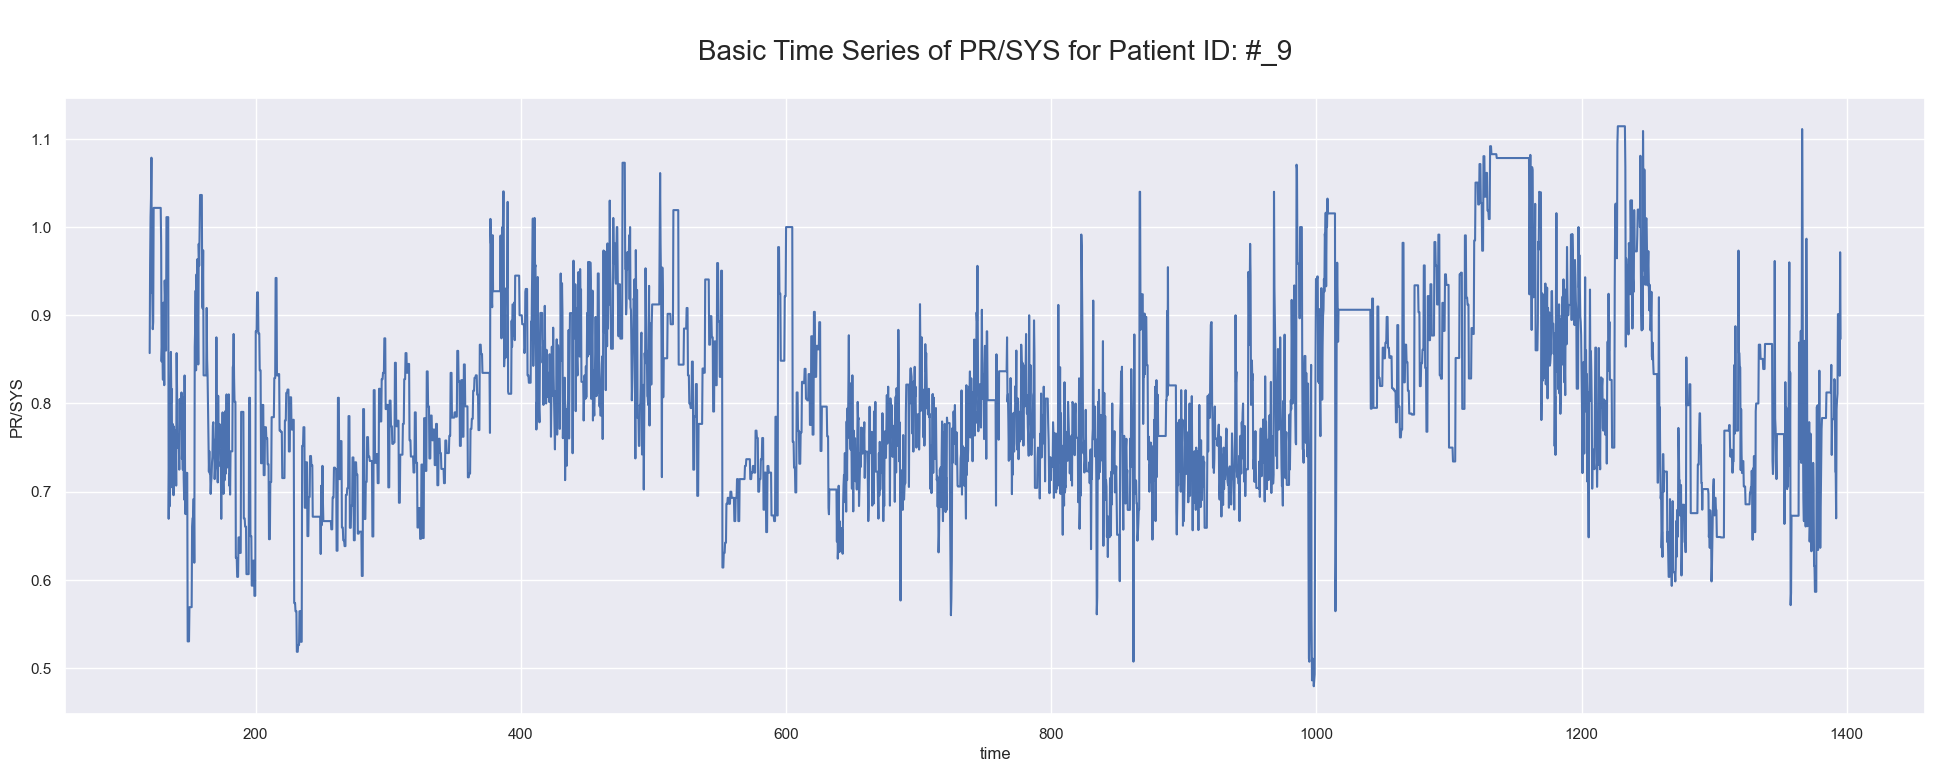

In [20]:
# 使用 Seaborn 绘制线性图，展示 ID #_9 的患者的 PR/SYS 随时间的变化
sns.set(rc={'figure.figsize':(24,8)})
ax = sns.lineplot(data=filled_data_id_9, x='time', y='PR/SYS')  # 使用筛选后的数据
ax.set_title("\nBasic Time Series of PR/SYS for Patient ID: #_9\n", fontsize=20)
plt.show()


特徵提取(id9)

In [21]:
# 選擇要較爲相關的變相，進行特徵選取
selected_features_df = filled_data_id_9[['PR/SYS', 'time']]
# 將'time'設置為索引
selected_features_df .set_index('time', inplace=True)
selected_features_df 

,PR/SYS
time,
120.00000,0.85714
120.33333,0.95745
120.66667,1.01136
121.00000,1.03261
121.33333,1.07865
...,...
1394.00000,0.90123
1394.33333,0.90123
1394.66667,0.83146


分割數據

In [22]:
# 參數設定
test_ratio = 0.4

# 計算測試集和驗證集的大小
total_size = len(selected_features_df)
test_size = int(total_size * test_ratio)  # 測試集原始大小
val_size = int(test_size * 0.5)          # 驗證集大小是測試集的一半

# 分割索引
test_start = total_size - test_size
val_start = test_start + val_size         # 驗證集開始的位置

# 分割DataFrame為訓練集、驗證集、測試集
train_df = selected_features_df.iloc[:test_start]
val_df = selected_features_df.iloc[test_start:val_start]
test_df = selected_features_df.iloc[val_start:]

# 檢查分割結果
print(f"訓練集大小：{len(train_df)}")
print(f"驗證集大小：{len(val_df)}")
print(f"測試集大小：{len(test_df)}")


訓練集大小：2297
驗證集大小：765
測試集大小：765


In [23]:
# 使用MinMaxScaler進行縮放
scaler = MinMaxScaler()
columns = train_df.columns

df_train = train_df.copy()
df_test = test_df.copy()
df_val = val_df.copy()
# 對訓練集的數值列進行擬合和轉換，用相同的scaler避免資料外洩
df_train[columns] = scaler.fit_transform(df_train[columns])
# 使用相同的scaler參數來轉換測試集和驗證集的數值列
df_test[columns] = scaler.transform(df_test[columns])
df_val[columns] = scaler.transform(df_val[columns])

In [24]:
df_train

,PR/SYS
time,
120.00000,0.612270
120.33333,0.787852
120.66667,0.882216
121.00000,0.919412
121.33333,1.000000
...,...
884.00000,0.447768
884.33333,0.447768
884.66667,0.447768


In [25]:
#转换DataFrame为Numpy数组
data_train = np.array(df_train)
data_val = np.array(df_val)
data_test = np.array(df_test)


In [26]:
data_train 

array([[0.61227026],
       [0.78785227],
       [0.882216  ],
       ...,
       [0.44776825],
       [0.44776825],
       [0.44776825]])

In [27]:
# 将值数组转换为数据集矩阵的函数
def create_dataset_multivariate(dataset, look_back=30):
    dataX, dataY = [], []
    for i in range(len(dataset) - look_back):
        # 获取 look_back 步长的数据作为输入
        a = dataset[i:(i + look_back), :]
        dataX.append(a)
        # 获取目标变量，假设目标变量是数据集中所有变量的最后一个值
        dataY.append(dataset[i + look_back, 0])  # 假设第0列是目标变量
    return np.array(dataX), np.array(dataY)

In [28]:
look_back = 30
# 创建数据集
trainX, trainY = create_dataset_multivariate(data_train, look_back)
valX, valY = create_dataset_multivariate(data_val, look_back)
testX, testY = create_dataset_multivariate(data_test, look_back)

# 重塑输入数据以适应LSTM的输入要求 [samples, time steps, features]
trainX = np.reshape(trainX, (trainX.shape[0], look_back, trainX.shape[2]))
valX = np.reshape(valX, (valX.shape[0], look_back, valX.shape[2]))
testX = np.reshape(testX, (testX.shape[0], look_back, testX.shape[2]))

print("trainX shape:", trainX.shape)
print("trainY shape:", trainY.shape)
print("ValX shape:", valX.shape)
print("ValY shape:", valY.shape)
print("testX shape:", testX.shape)
print("testY shape:", testY.shape)

trainX shape: (2267, 30, 1)
trainY shape: (2267,)
ValX shape: (735, 30, 1)
ValY shape: (735,)
testX shape: (735, 30, 1)
testY shape: (735,)


In [29]:
import torch
import torch.nn as nn
from torch.utils.data import TensorDataset
import torch
from torch.utils.data import DataLoader
from torchmetrics import MeanAbsoluteError, MeanAbsolutePercentageError, MeanSquaredError
device = torch.device('cpu')



/Users/apple/Library/Python/3.9/lib/python/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [30]:
class LSTMModel(nn.Module):
    def __init__(self, input_size, hidden_size, num_layers, output_size, batch_size, dropout, device):
        super(LSTMModel, self).__init__()
        self.input_size = input_size
        self.hidden_size = hidden_size
        self.num_layers = num_layers
        self.output_size = output_size
        self.dropout = dropout
        self.device = device

        self.lstm = nn.LSTM(
            input_size=input_size, 
            hidden_size=hidden_size, 
            num_layers=num_layers,
            batch_first=True
            )
        self.dropout = nn.Dropout(dropout)
        self.fc = nn.Linear(in_features=hidden_size, out_features=output_size)
        
        return
        
    def forward(self, x):
        h0 = torch.zeros(self.num_layers, x.size(0), self.hidden_size).to(self.device)
        c0 = torch.zeros(self.num_layers, x.size(0), self.hidden_size).to(self.device)
        out, _ = self.lstm(x, (h0, c0))
        
        out = self.dropout(out)
        # out = out.contiguous().view(-1, self.hidden_size)
        out = out[:, -1, :]
        out = self.fc(out)
        return out


input_size = 1
hidden_size = 64
num_layers = 2
output_size = 1
batch_size = 128
drop_rate = 0.3
device = torch.device('cpu')
model = LSTMModel(
    input_size=input_size, 
    hidden_size=hidden_size,
    num_layers=num_layers,
    output_size=output_size,
    batch_size=batch_size,
    dropout=drop_rate,
    device=device
).to(device)
model

LSTMModel(
  (lstm): LSTM(1, 64, num_layers=2, batch_first=True)
  (dropout): Dropout(p=0.3, inplace=False)
  (fc): Linear(in_features=64, out_features=1, bias=True)
)

In [31]:
X_train_tensor = torch.from_numpy(trainX.astype(np.float32))
X_val_tensor = torch.from_numpy(valX.astype(np.float32))
X_test_tensor = torch.from_numpy(testX.astype(np.float32))

y_train_tensor = torch.from_numpy(trainY.astype(np.float32).reshape(-1, 1))
y_val_tensor = torch.from_numpy(valY.astype(np.float32).reshape(-1, 1))
y_test_tensor = torch.from_numpy(testY.astype(np.float32).reshape(-1, 1))

train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
train_loader = DataLoader(
    train_dataset, 
    batch_size=batch_size, 
    drop_last=True,
    shuffle=True
)

val_dataset = TensorDataset(X_val_tensor, y_val_tensor)
val_loader = DataLoader(
    val_dataset,
    batch_size=batch_size,
    drop_last = True,
    shuffle=False
)

In [32]:
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
criterion = nn.MSELoss()

n_past = 30
input_size = 1
output_size = 1

optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
criterion = nn.MSELoss()

train_loss_arr = []
val_loss_arr = []

for epoch in range(75):
    model.train()
    train_loss = []
    val_loss = []

    for i, (inputs, labels) in enumerate(train_loader):
        inputs = inputs.reshape(-1, n_past, input_size).to(device)
        labels = labels.reshape(-1, output_size).to(device)
        
        outputs = model(inputs)
        optimizer.zero_grad()
        loss = criterion(outputs, labels)
        loss.backward()
        train_loss.append(loss.item())
        optimizer.step()

    model.eval()
    with torch.no_grad():
        for i, (inputs, labels) in enumerate(val_loader):
            inputs = inputs.reshape(-1, n_past, input_size).to(device)
            labels = labels.reshape(-1, output_size).to(device)
            
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            val_loss.append(loss.item())

    epoch_train_loss = sum(train_loss)/len(train_loss)
    epoch_val_loss = sum(val_loss)/len(val_loss)

    train_loss_arr.append(epoch_train_loss)
    val_loss_arr.append(epoch_val_loss)

    print(f'Epoch [{epoch+1}/{75}], Train Loss: {epoch_train_loss:.4f}, Val Loss: {epoch_val_loss:.4f}')

Epoch [1/75], Train Loss: 0.0973, Val Loss: 0.0290
Epoch [2/75], Train Loss: 0.0282, Val Loss: 0.0317
Epoch [3/75], Train Loss: 0.0254, Val Loss: 0.0307
Epoch [4/75], Train Loss: 0.0231, Val Loss: 0.0252
Epoch [5/75], Train Loss: 0.0183, Val Loss: 0.0195
Epoch [6/75], Train Loss: 0.0154, Val Loss: 0.0177
Epoch [7/75], Train Loss: 0.0151, Val Loss: 0.0168
Epoch [8/75], Train Loss: 0.0146, Val Loss: 0.0174
Epoch [9/75], Train Loss: 0.0137, Val Loss: 0.0160
Epoch [10/75], Train Loss: 0.0136, Val Loss: 0.0157
Epoch [11/75], Train Loss: 0.0129, Val Loss: 0.0158
Epoch [12/75], Train Loss: 0.0125, Val Loss: 0.0151
Epoch [13/75], Train Loss: 0.0127, Val Loss: 0.0148
Epoch [14/75], Train Loss: 0.0126, Val Loss: 0.0156
Epoch [15/75], Train Loss: 0.0122, Val Loss: 0.0145
Epoch [16/75], Train Loss: 0.0118, Val Loss: 0.0143
Epoch [17/75], Train Loss: 0.0119, Val Loss: 0.0152
Epoch [18/75], Train Loss: 0.0118, Val Loss: 0.0139
Epoch [19/75], Train Loss: 0.0113, Val Loss: 0.0146
Epoch [20/75], Train 

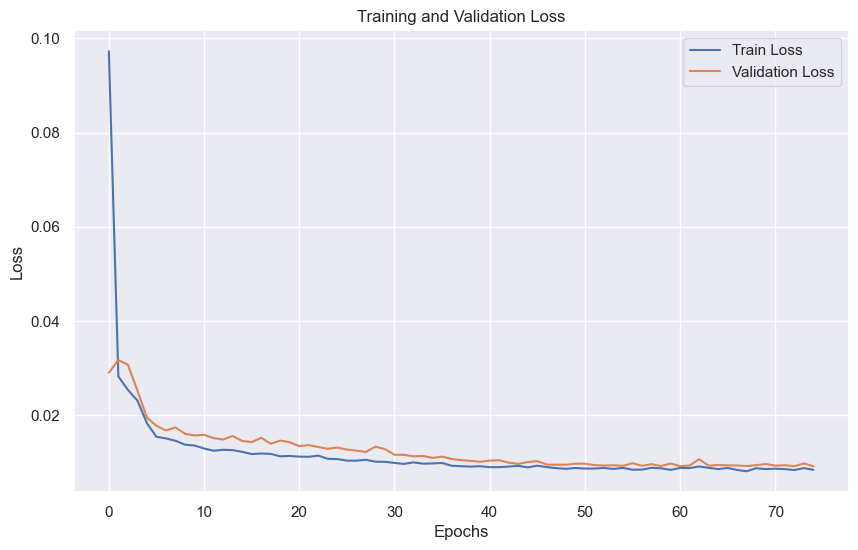

In [33]:
import matplotlib.pyplot as plt

# 确保在notebook中可以显示图像
%matplotlib inline

# 绘制训练损失和验证损失
plt.figure(figsize=(10, 6))  # 设置图像大小
plt.plot(train_loss_arr, label='Train Loss')  # 绘制训练损失
plt.plot(val_loss_arr, label='Validation Loss')  # 绘制验证损失
plt.title('Training and Validation Loss')  # 图像标题
plt.xlabel('Epochs')  # x轴标签
plt.ylabel('Loss')  # y轴标签
plt.legend()  # 显示图例
plt.show()  # 显示图像


正確的

In [34]:
# 模型评估
model.eval()
with torch.no_grad():
    train_predicted = model(X_train_tensor.reshape(-1, n_past, input_size).to(device)).to('cpu')
    val_predicted = model(X_val_tensor.reshape(-1, n_past, input_size).to(device)).to('cpu')
    test_predicted = model(X_test_tensor.reshape(-1, n_past, input_size).to(device)).to('cpu')
    # 反向缩放预测值
def inverse_transform(predictions, original_data, scaler):
    # 使用全数据结构进行反向缩放
    full_data = np.concatenate((predictions, original_data[:, -1, 1:]), axis=1)
    inversed_data = scaler.inverse_transform(full_data)
    return inversed_data[:, 0]  # 只提取目标变量

# 反向缩放数据
trainPredict_inv = inverse_transform(train_predicted , trainX, scaler)
valPredict_inv = inverse_transform(val_predicted, valX, scaler)
testPredict_inv = inverse_transform(test_predicted, testX, scaler)
# 提取真实的 PR/SYS 值
true_values = selected_features_df['PR/SYS'].values

# 获取 look_back 的值
look_back = 30



In [35]:
# 重置索引，使得'time'成为一个列
selected_features_df = selected_features_df.reset_index()

In [36]:
if 'level_0' in selected_features_df.columns:
    selected_features_df = selected_features_df.drop(columns=['level_0'])


In [37]:
selected_features_df

,time,PR/SYS
0,120.00000,0.85714
1,120.33333,0.95745
2,120.66667,1.01136
3,121.00000,1.03261
4,121.33333,1.07865
...,...,...
3822,1394.00000,0.90123
3823,1394.33333,0.90123
3824,1394.66667,0.83146
3825,1395.00000,0.97143


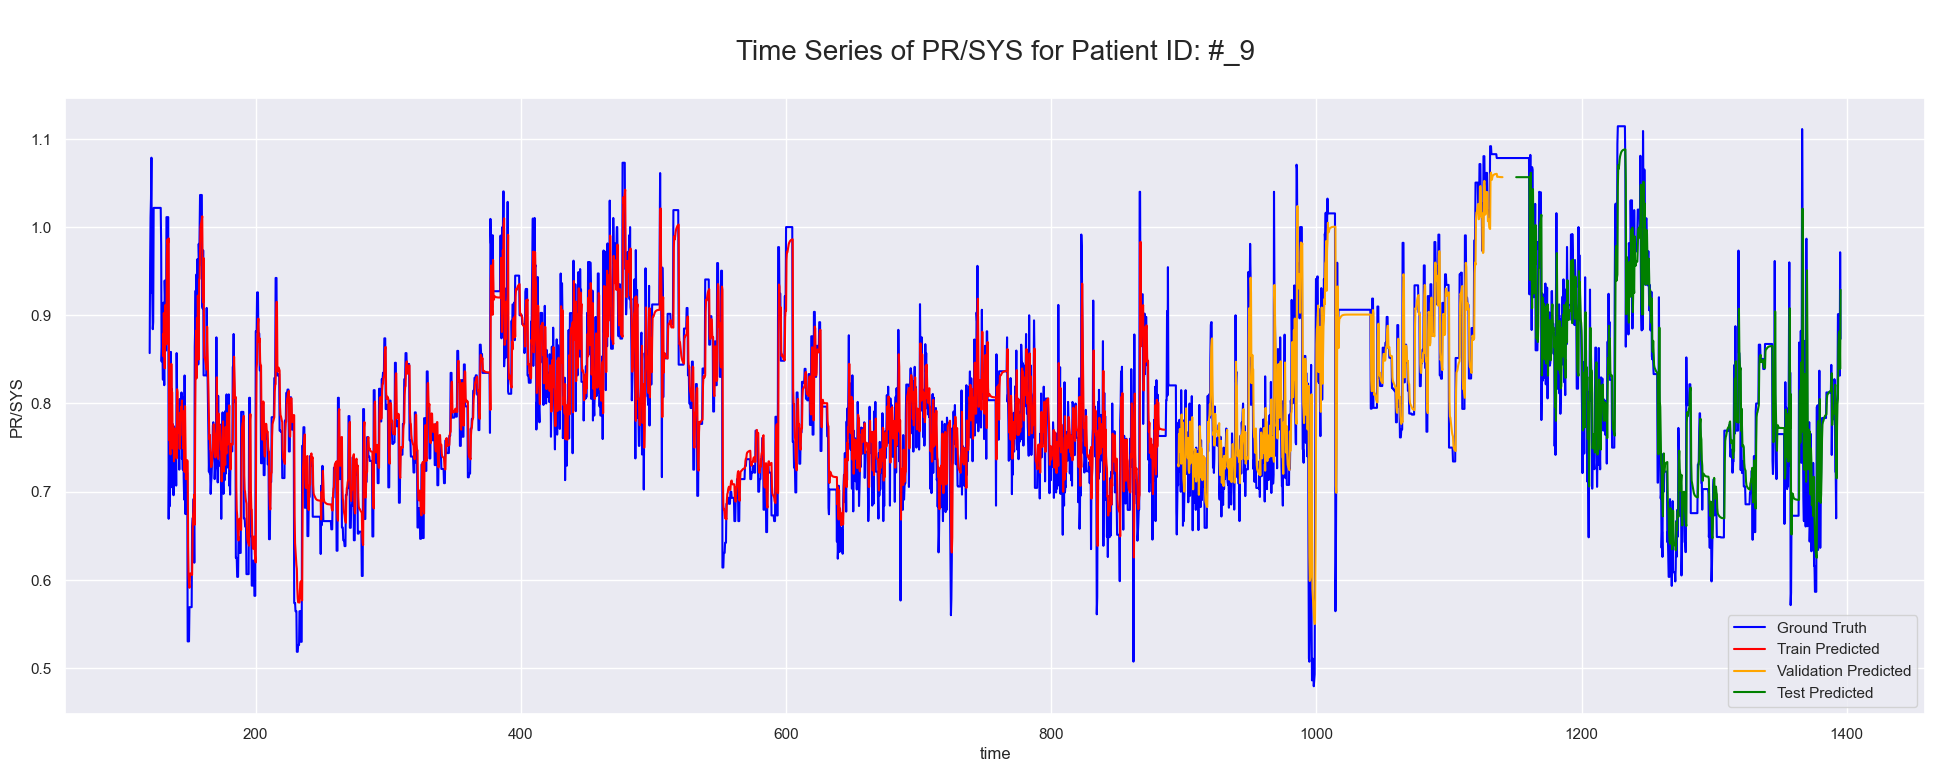

In [38]:
# 调整时间序列以考虑 look_back 周期
X_train_time = selected_features_df['time'][look_back:look_back + len(train_predicted)]
X_val_time = selected_features_df['time'][look_back + len(train_predicted) + look_back:look_back + len(train_predicted) + look_back + len(val_predicted)]
X_test_time = selected_features_df['time'][look_back + len(train_predicted) + look_back + len(val_predicted) + look_back:look_back + len(train_predicted) + look_back + len(val_predicted) + look_back + len(test_predicted)]

# 创建预测值的数据框
# 将预测值与时间信息组合成DataFrame
train_predictions_df = pd.DataFrame({'time': X_train_time, 'PR/SYS': trainPredict_inv.squeeze()})
val_predictions_df = pd.DataFrame({'time': X_val_time, 'PR/SYS': valPredict_inv.squeeze()})
test_predictions_df = pd.DataFrame({'time': X_test_time, 'PR/SYS': testPredict_inv.squeeze()})

# 使用Seaborn绘制真实值
sns.set(rc={'figure.figsize':(24,8)})
ax = sns.lineplot(data=selected_features_df, x='time', y='PR/SYS', label='Ground Truth', color='blue')

# 添加预测结果的线性图层
sns.lineplot(data=train_predictions_df, x='time', y='PR/SYS', ax=ax, label='Train Predicted', color='red')
sns.lineplot(data=val_predictions_df, x='time', y='PR/SYS', ax=ax, label='Validation Predicted', color='orange')
sns.lineplot(data=test_predictions_df, x='time', y='PR/SYS', ax=ax, label='Test Predicted', color='green')

# 设置标题
ax.set_title("\nTime Series of PR/SYS for Patient ID: #_9\n", fontsize=20)

# 显示图例
plt.legend()
plt.show()

In [39]:
import numpy as np
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import torch
import torchmetrics
from torchmetrics import MeanAbsoluteError, MeanAbsolutePercentageError, MeanSquaredError
# 提取与预测值对齐的真实值
train_true_values = true_values[look_back:look_back + len(train_predicted)]
val_true_values = true_values[look_back + len(train_predicted) + look_back:look_back + len(train_predicted) + look_back + len(val_predicted)]
test_true_values = true_values[look_back + len(train_predicted) + look_back + len(val_predicted) + look_back:look_back + len(train_predicted) + look_back + len(val_predicted) + look_back + len(test_predicted)]

# 将 numpy.ndarray 转换为 torch.Tensor
train_true_values_tensor = torch.tensor(train_true_values, dtype=torch.float32)
trainPredict_inv_tensor = torch.tensor(trainPredict_inv, dtype=torch.float32)
val_true_values_tensor = torch.tensor(val_true_values, dtype=torch.float32)
valPredict_inv_tensor = torch.tensor(valPredict_inv, dtype=torch.float32)
test_true_values_tensor = torch.tensor(test_true_values, dtype=torch.float32)
testPredict_inv_tensor = torch.tensor(testPredict_inv, dtype=torch.float32)

# 使用 torchmetrics 计算 MAE 和 RMSE
mae_metric = torchmetrics.MeanAbsoluteError()
rmse_metric = torchmetrics.MeanSquaredError(squared=False)
mape_metric = MeanAbsolutePercentageError()

# 使用 torchmetrics 计算 MAE、RMSE 和 MAPE
mae_metric = torchmetrics.MeanAbsoluteError()
rmse_metric = torchmetrics.MeanSquaredError(squared=False)
mape_metric = torchmetrics.MeanAbsolutePercentageError()

# 计算训练集的 MAE、RMSE 和 MAPE
train_mae = round(mae_metric(trainPredict_inv_tensor, train_true_values_tensor).item() * 100, 2)
train_rmse = round(rmse_metric(trainPredict_inv_tensor, train_true_values_tensor).item() * 100, 2)
train_mape = round(mape_metric(trainPredict_inv_tensor, train_true_values_tensor).item() * 100, 2)

print(f"Train MAE: {train_mae}%")
print(f"Train RMSE: {train_rmse}%")
print(f"Train MAPE: {train_mape}%")

# 计算验证集的 MAE、RMSE 和 MAPE
val_mae = round(mae_metric(valPredict_inv_tensor, val_true_values_tensor).item() * 100, 2)
val_rmse = round(rmse_metric(valPredict_inv_tensor, val_true_values_tensor).item() * 100, 2)
val_mape = round(mape_metric(valPredict_inv_tensor, val_true_values_tensor).item() * 100, 2)

print(f"Validation MAE: {val_mae}%")
print(f"Validation RMSE: {val_rmse}%")
print(f"Validation MAPE: {val_mape}%")

# 计算测试集的 MAE、RMSE 和 MAPE
test_mae = round(mae_metric(testPredict_inv_tensor, test_true_values_tensor).item() * 100, 2)
test_rmse = round(rmse_metric(testPredict_inv_tensor, test_true_values_tensor).item() * 100, 2)
test_mape = round(mape_metric(testPredict_inv_tensor, test_true_values_tensor).item() * 100, 2)

print(f"Test MAE: {test_mae}%")
print(f"Test RMSE: {test_rmse}%")
print(f"Test MAPE: {test_mape}%")

Train MAE: 3.37%
Train RMSE: 4.92%
Train MAPE: 4.39%
Validation MAE: 3.39%
Validation RMSE: 5.3%
Validation MAPE: 4.25%
Test MAE: 3.92%
Test RMSE: 5.69%
Test MAPE: 4.89%


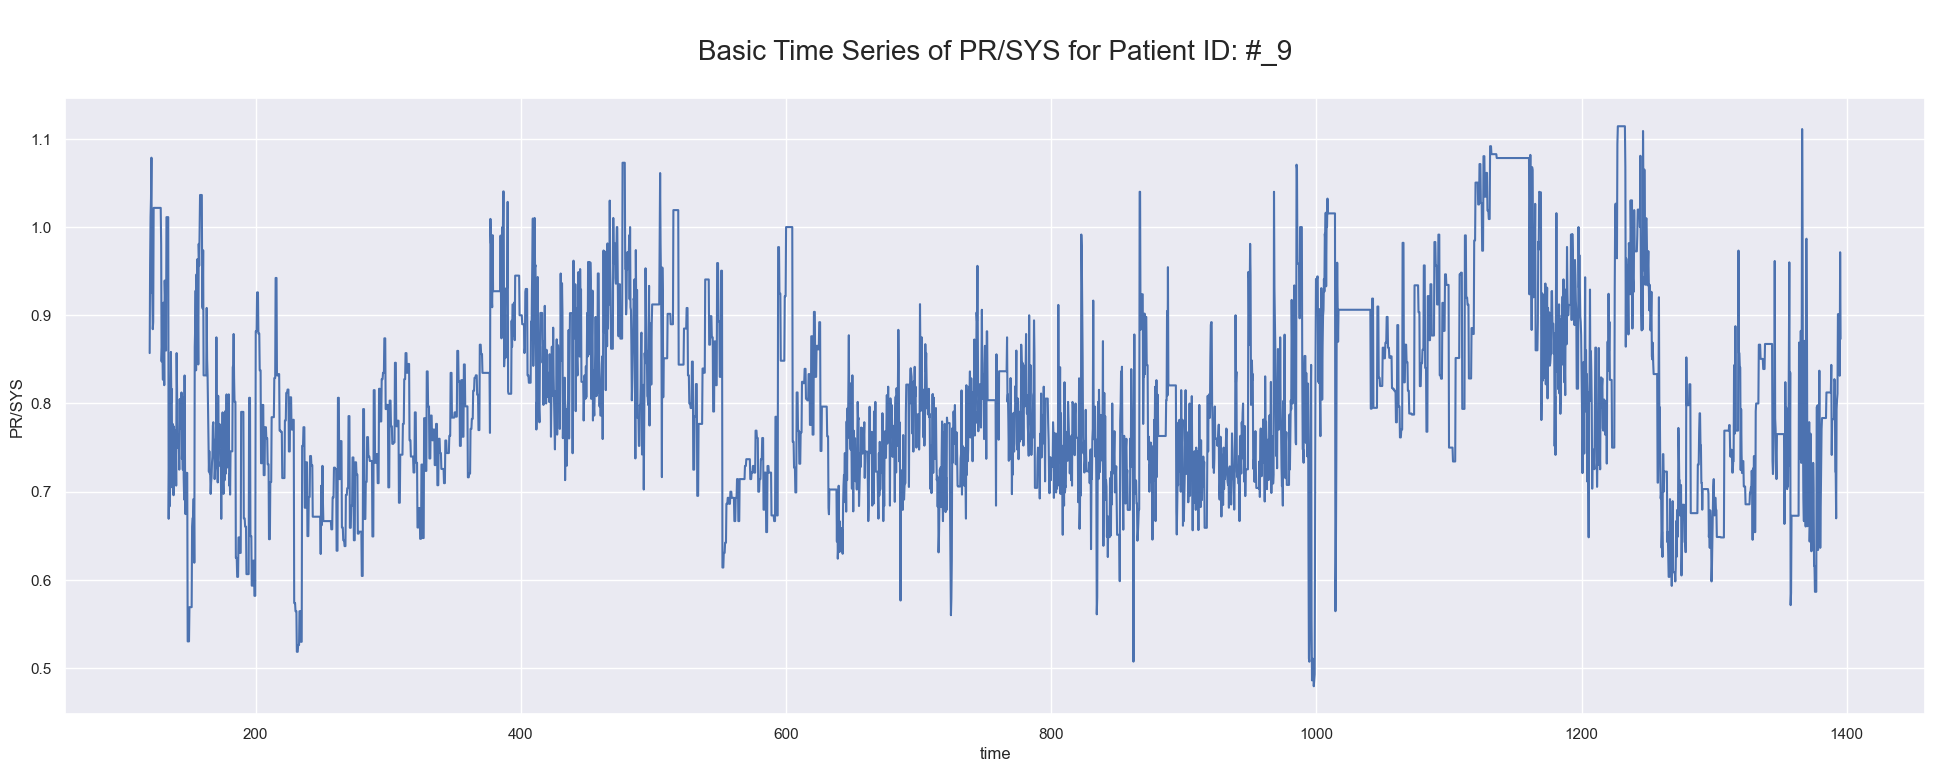

In [40]:
# 使用 Seaborn 绘制线性图，展示 ID #_9 的患者的 PR/SYS 随时间的变化
sns.set(rc={'figure.figsize':(24,8)})
ax = sns.lineplot(data=filled_data_id_9, x='time', y='PR/SYS')  # 使用筛选后的数据
ax.set_title("\nBasic Time Series of PR/SYS for Patient ID: #_9\n", fontsize=20)
plt.show()


In [42]:
train_predictions_df

,time,PR/SYS
30,130.00000,0.878630
31,130.33333,0.853526
32,130.66667,0.902500
33,131.00000,0.885116
34,131.33333,0.839827
...,...,...
2292,884.00000,0.770443
2293,884.33333,0.770387
2294,884.66667,0.770346
2295,885.00000,0.770316


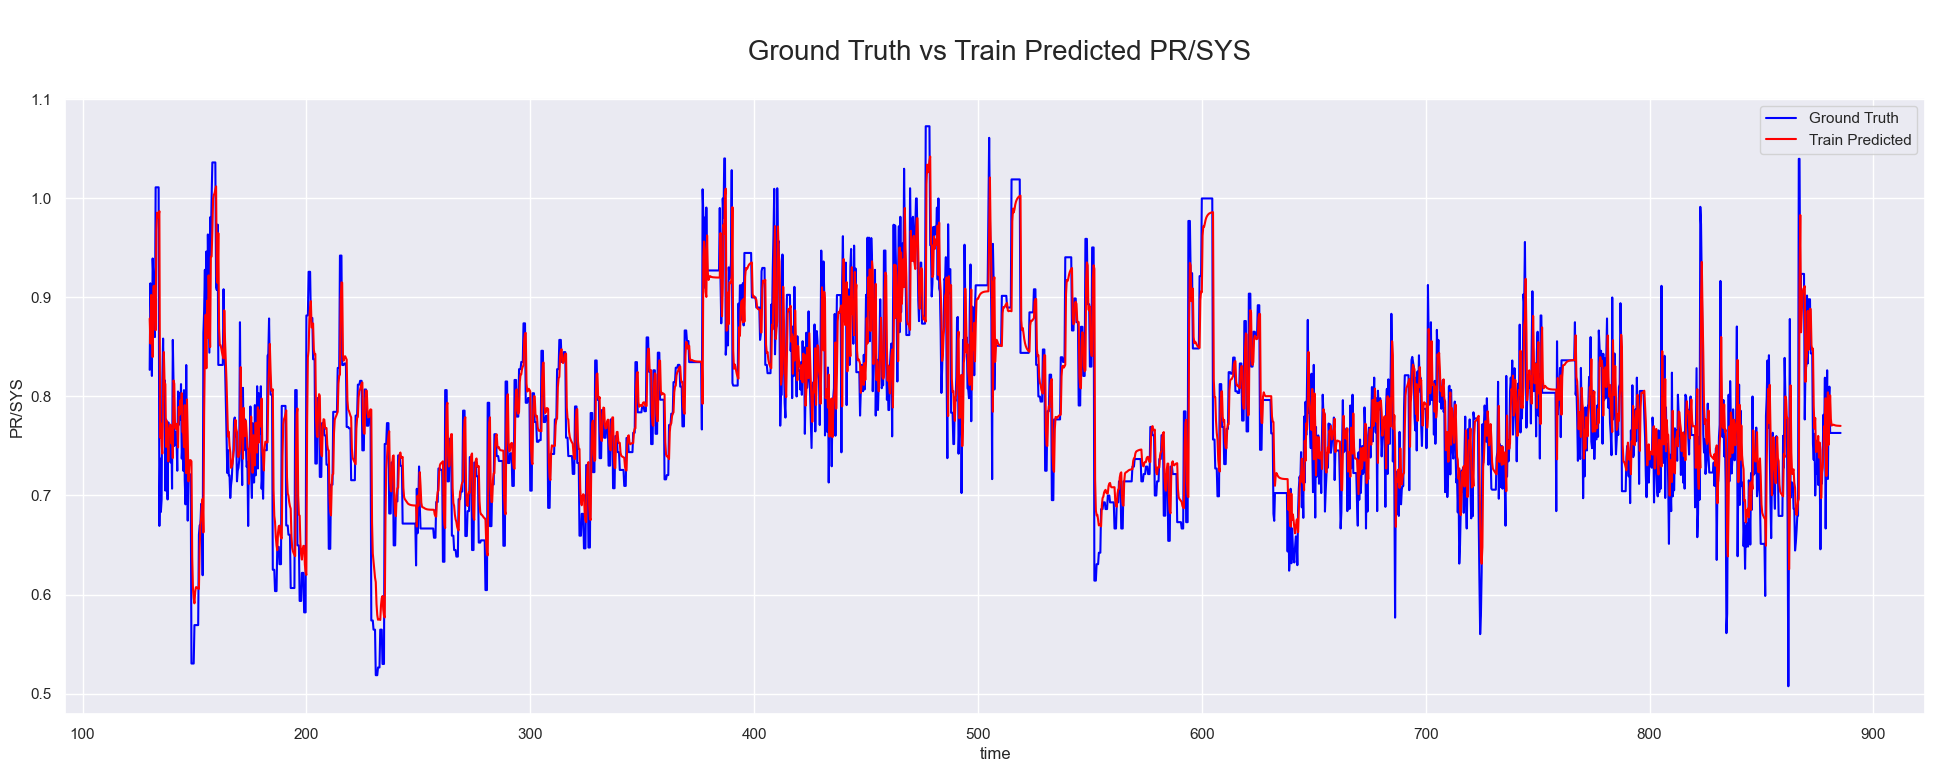

In [41]:
# 设置要显示的时间范围，调整时间范围以显示更多细节
time_min = 130.00000
time_max = 885.33333

# 过滤数据
selected_features_subset = selected_features_df[(selected_features_df['time'] >= time_min) & (selected_features_df['time'] <= time_max)]
test_predictions_subset = train_predictions_df[(train_predictions_df['time'] >= time_min) & (train_predictions_df['time'] <= time_max)]

# 绘制真实值
ax = sns.lineplot(data=selected_features_subset, x='time', y='PR/SYS', label='Ground Truth', color='blue')

# 添加测试集预测结果的线性图层
sns.lineplot(data=test_predictions_subset, x='time', y='PR/SYS', ax=ax, label='Train Predicted', color='red')

# 设置标题
ax.set_title("\n Ground Truth vs Train Predicted PR/SYS\n", fontsize=20)

# 显示图例
plt.legend()
plt.show()

In [ ]:
val_predictions_df

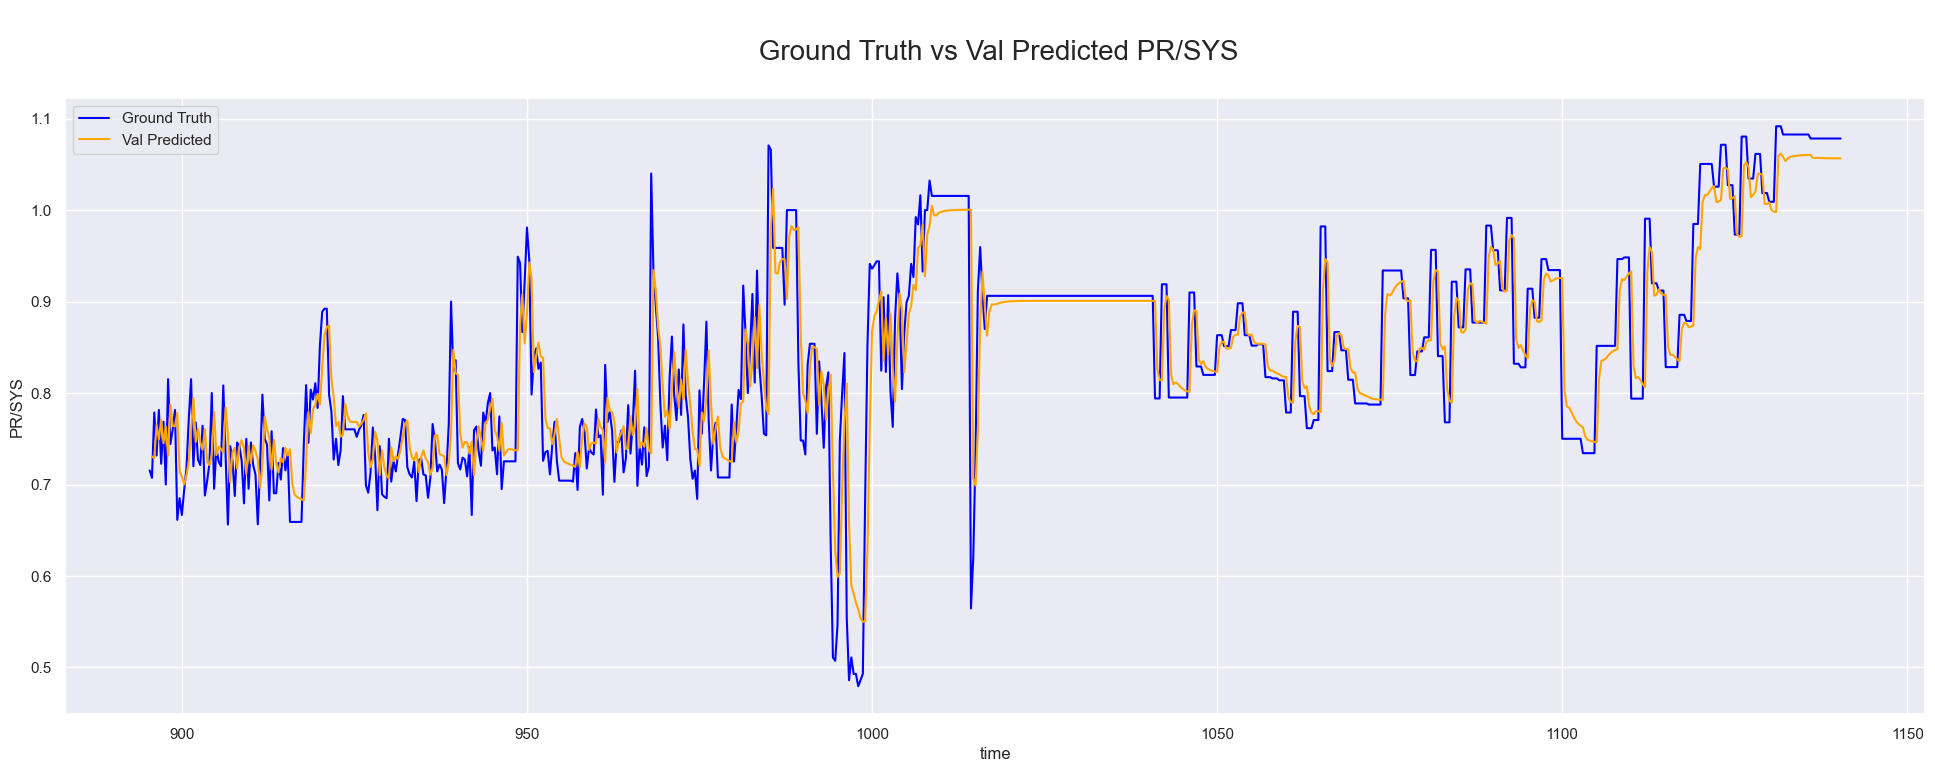

In [43]:
# 设置要显示的时间范围，调整时间范围以显示更多细节
time_min = 895.33333
time_max = 1140.33333

# 过滤数据
selected_features_subset = selected_features_df[(selected_features_df['time'] >= time_min) & (selected_features_df['time'] <= time_max)]
test_predictions_subset = val_predictions_df[(val_predictions_df['time'] >= time_min) & (val_predictions_df['time'] <= time_max)]

# 绘制真实值
ax = sns.lineplot(data=selected_features_subset, x='time', y='PR/SYS', label='Ground Truth', color='blue')

# 添加测试集预测结果的线性图层
sns.lineplot(data=test_predictions_subset, x='time', y='PR/SYS', ax=ax, label='Val Predicted', color='orange')

# 设置标题
ax.set_title("\n Ground Truth vs Val Predicted PR/SYS\n", fontsize=20)

# 显示图例
plt.legend()
plt.show()

In [ ]:
test_predictions_df

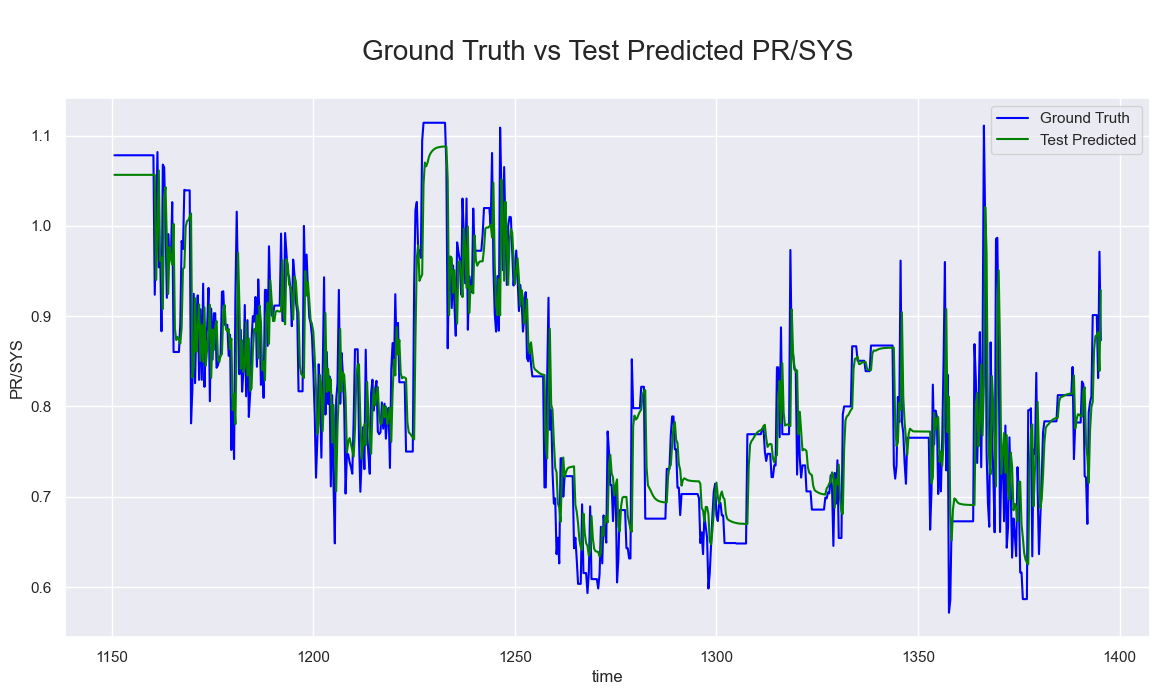

In [44]:
import seaborn as sns
import matplotlib.pyplot as plt

# 假设 'PR/SYS' 是第一列
column_index = selected_features_df.columns.get_loc('PR/SYS')

# 将预测值与时间信息组合成 DataFrame
train_predictions_df = pd.DataFrame({'time': X_train_time, 'PR/SYS': trainPredict_inv})
val_predictions_df = pd.DataFrame({'time': X_val_time, 'PR/SYS': valPredict_inv})
test_predictions_df = pd.DataFrame({'time': X_test_time, 'PR/SYS': testPredict_inv})

# 绘制单独的真值与测试集对比图（缩小时间范围）
sns.set(rc={'figure.figsize':(14, 7)})

# 设置要显示的时间范围，调整时间范围以显示更多细节
time_min = 1150.66667
time_max = 1395.33333

# 过滤数据
selected_features_subset = selected_features_df[(selected_features_df['time'] >= time_min) & (selected_features_df['time'] <= time_max)]
test_predictions_subset = test_predictions_df[(test_predictions_df['time'] >= time_min) & (test_predictions_df['time'] <= time_max)]

# 绘制真实值
ax = sns.lineplot(data=selected_features_subset, x='time', y='PR/SYS', label='Ground Truth', color='blue')

# 添加测试集预测结果的线性图层
sns.lineplot(data=test_predictions_subset, x='time', y='PR/SYS', ax=ax, label='Test Predicted', color='green')

# 设置标题
ax.set_title("\nGround Truth vs Test Predicted PR/SYS\n", fontsize=20)

# 显示图例
plt.legend()
plt.show()
